In [1]:
from netCDF4 import Dataset
import numpy as np
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt

/shared/cmip5/data/rcp45/atmos/mon/Amon/tas/NCAR.CCSM4/r1i1p1/tas_Amon_CCSM4_rcp45_r1i1p1_200601-210012.nc
1
/shared/cmip5/data/rcp45/atmos/mon/Amon/tas/NCAR.CCSM4/r1i1p1/tas_Amon_CCSM4_rcp45_r1i1p1_200601-210012.nc


/opt/anaconda3/lib/python3.6/site-packages/cartopy/util.py:102: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  new_data = ma.concatenate((data, data[slicer]), axis=axis)


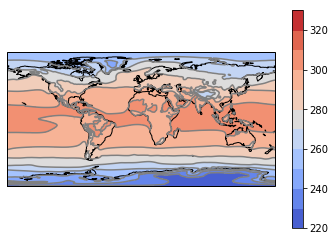

2
/shared/cmip5/data/rcp45/atmos/mon/Amon/tas/NCAR.CCSM4/r2i1p1/tas_Amon_CCSM4_rcp45_r2i1p1_200601-210012.nc


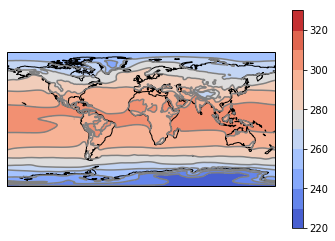

3
/shared/cmip5/data/rcp45/atmos/mon/Amon/tas/NCAR.CCSM4/r3i1p1/tas_Amon_CCSM4_rcp45_r3i1p1_200601-210012.nc


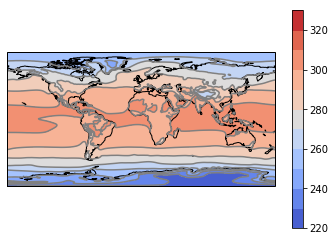

4
/shared/cmip5/data/rcp45/atmos/mon/Amon/tas/NCAR.CCSM4/r4i1p1/tas_Amon_CCSM4_rcp45_r4i1p1_200601-210012.nc


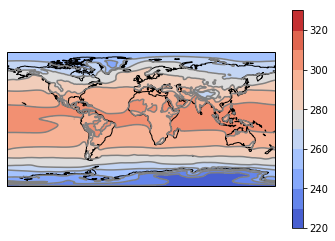

In [2]:
varname='tas'
rcp='rcp45'
modelNameLong='NCAR.CCSM4'
modelNameShort='CCSM4'
dates='200601-210012'

nens=4
inPath='/shared/cmip5/data/rcp45/atmos/mon/Amon/tas/'

# Read in 1st file to get dimensions
inFile='%s%s/r1i1p1/%s_Amon_%s_%s_r1i1p1_%s.nc' %(inPath,modelNameLong,varname,modelNameShort,rcp,dates)
print(inFile)
ncfile=Dataset(inFile,'r')
lats=ncfile.variables['lat'][:]
lons=ncfile.variables['lon'][:]
nx=lons.size
ny=lats.size

# Create annual mean array with all zeros
ann=np.zeros((nens,ny,nx))
    
# Loop over all ensemble members and fill data array


for i in range(1,nens+1):
    
    print(i)
    inFile='%s%s/r%si1p1/%s_Amon_%s_%s_r%si1p1_%s.nc' %(inPath,modelNameLong,i,varname,modelNameShort,rcp,i,dates)
    print(inFile)
    ncfile=Dataset(inFile,'r')
    lats=ncfile.variables['lat'][:]
    lons=ncfile.variables['lon'][:]
    data=ncfile.variables[varname][:,:,:]
    
    # Calculate the annual mean for each ensemble member
    ann[i-1,:,:]=np.mean(data,axis=0)
    
    # Plot first time of each ensemble member
    ax=plt.axes(projection=ccrs.PlateCarree())
    clevs = np.arange(220,340,10)
    x=np.ones((ny,nx))*ann[i-1,:,np.newaxis]
    datacyc,loncyc=add_cyclic_point(ann[i-1,:,:],coord=lons)
    contour=ax.contourf(loncyc, lats, datacyc, levels = clevs,cmap=plt.cm.coolwarm, transform = ccrs.PlateCarree())
    ax.coastlines()
    plt.colorbar(contour)
    contourlines=ax.contour(loncyc,lats,datacyc,levels=clevs,transform=ccrs.PlateCarree(),colors='gray')
    plt.show()

Calculate the Ensemble Mean

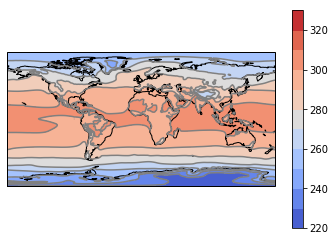

In [3]:
# Calculate the ensemble mean
emean=np.mean(ann,axis=0)
    
# Plot ensemble mean
ax=plt.axes(projection=ccrs.PlateCarree())
clevs = np.arange(220,340,10)
x=np.ones((ny,nx))*emean[:,np.newaxis]
datacyc,loncyc=add_cyclic_point(emean[:,:],coord=lons)
contour=ax.contourf(loncyc, lats, datacyc, levels = clevs,cmap=plt.cm.coolwarm, transform = ccrs.PlateCarree())
ax.coastlines()
plt.colorbar(contour)
contourlines=ax.contour(loncyc,lats,datacyc,levels=clevs,transform=ccrs.PlateCarree(),colors='gray')
plt.show()

In [4]:
# Calculate the ensemble spread
diff=np.zeros((nens,ny,nx))
for iens in range(0,nens):
    diff[iens,:,:]=emean-ann[iens,:,:]
    
# Calculate the SQRT of sum squared difference over all ensemble members
spread=np.sqrt(np.sum(diff*diff,axis=0))
print(np.min(spread), np.max(spread))

0.002027237946353228 0.6588922997353223


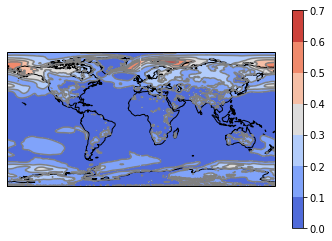

In [5]:
# Plot ensemble spread
ax=plt.axes(projection=ccrs.PlateCarree())
contour=ax.contourf(lons, lats, spread,cmap=plt.cm.coolwarm, transform = ccrs.PlateCarree())
ax.coastlines()
plt.colorbar(contour)
contourlines=ax.contour(lons,lats,spread,transform=ccrs.PlateCarree(),colors='gray')
plt.show()